In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import bootcampviztools as btc

Grupo Hotusa - Data Analyst/Scientist test.
Tarea para candidatos que aplican a un puesto de Data Analyst/Scientist en Grupo Hotusa.

Descripción de la tarea
El dataset (clients_analysis.csv) con el que trabajar contiene las siguientes columnas:

id_secuencial: Id de Cliente (valor entero).

Idioma: Idioma con el que dirigirse al cliente.

genero: Género del cliente.

tratamiento: Forma de dirigirse al cliente.

alta_cliente: Fecha de alta del cliente.

comunicaciones_comerciales: Si el cliente permite comunicaciones comerciales o no.

alta_comunicaciones: Fecha en la que el cliente aceptó las comunicaciones comerciales.

nivel_fidelizacion: Nivel en el programa de fidelización de la empresa del cliente.

alta_fidelizacion: Fecha en la que el cliente se dio de alta en el programa de fidelización.

fecha_nacimiento: Fecha de nacimiento del cliente.

mail: Si el cliente tiene un mail informado en su ficha de cliente o no.

Total_Reservation: Número total de reservas del cliente.

media_estancia: Duración media de las estancias del cliente.

antelacion_media: Antelación media con la que se hacen las reservas.

facturacion: Total de facturación del cliente.

Canal_reserva: Canal de reserva más habitual del cliente.

Motivo_viaje: Motivo del viaje/Segmento.

ultima_reserva: Fecha de la última reserva.

n_hoteles_distintos: Número de hoteles distintos en los que se ha alojado el cliente.

acompanante: Acompañante más recurrente en sus reservas.

Debes crear un report reproducible (en un notebook en Python o R) siguiendo estos pasos:

Estandarización y limpieza: Puedes observar que el csv está desordenado, las columnas no tienen una estándar en cuanto a la nomenclatura y los valores, en su mayoría, ni siquiera tienen un formato adecuado. Esto se debe a que se han recogido datos de varias fuentes diferentes. Desde el departamento de Marketing quieren usar esta información de manera que les sea sencillo filtrar y extraer los clientes a los que impactar en comunicaciones comerciales. ¿Qué tipo de limpieza, agrupaciones o estandarizaciones piensas que podrían hacerse? Realiza los que creas de importancia. [Ejemplo: transformar la columna 'mail' en booleano, estandarizar los nombres de las columnas a un único idioma, etc.]


### EDA: ¿Existen columnas que no sean útiles? ¿Crees que podemos extraer alguna otra nueva? Haz un breve análisis descriptivo de los datos. Propón y realiza un par de análisis que te parezcan interesantes en cuanto a los clientes.

En un primer analisis visual vemos que las columnas se encuentran en diferentes idiomas y tambien nos encontramos con una gran cantidad de nulos. 

Las columnas de nivel_fidelizacion y alta_fidelizacion asi como comunicaciones_comerciales y altas comunicaciones tiene un gran nivel de nulos por encima del 90%. Podriamos descartas esas columnas ya de inicio pero me gustaria ver si en ese menos de 10% de los datos nos encontramos alguna conclusión. En caso negativo procedere a eliminarlas. 

Por otro lado observo que las columnas de que contienen datos sobre facturación, reservas y datos interesantes para un posible modelo predictivo tienen casi un 50% de nulo. Como me gustaria centrar el analisis en facturacion y nivel de estancias en este caso voy a eliminar todas las columnas que no contengan esta informacion que considero crucial. 

In [158]:
df = pd.read_csv("./data/clients_analysis.csv") 

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_secuencial               100000 non-null  object 
 1   Idioma                      99998 non-null   object 
 2   genero                      99562 non-null   object 
 3   tratamiento                 98698 non-null   object 
 4   alta_cliente                100000 non-null  object 
 5   pais                        99995 non-null   object 
 6   comunicaciones_comerciales  6088 non-null    object 
 7   alta_comunicaciones         6088 non-null    object 
 8   nivel_fidelizacion          1750 non-null    object 
 9   alta_fidelizacion           1481 non-null    object 
 10  fecha_nacimiento            99674 non-null   object 
 11  mail                        26605 non-null   object 
 12  Total_Reservation           59378 non-null   float64
 13  media_estancia 

Cambio de idioma de todos los titulos de columna para unificar en ingles


In [160]:
df.columns = [
    'sequential_id', 'language', 'gender', 'treatment', 'customer_signup',
    'country', 'commercial_communications', 'communications_signup',
    'loyalty_level', 'loyalty_signup', 'birth_date', 'email',
    'total_reservations', 'average_stay', 'average_advance_booking',
    'billing', 'reservation_channel', 'travel_reason', 'last_reservation',
    'different_hotels', 'companion'
]

In [161]:
df = df.dropna(subset=['billing'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     58902 non-null  object 
 3   treatment                  58158 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      23037 non-null  object 
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Limpieza de la columna Billing

He observado que la columna es de tipo float y haciendo pruebas veo que el problema es que los valores con miles se separan por "." al igual que los decimales y eso hace imposible la transformacion.

Para evitar ese problema he creado una pequeña funcion que separa en partes cada vez que se encuentra un punto, en el caso de que solo se separe en dos partes la vuelve a unir y en caso de ser en mas partes, las vuelve a unir pero con la diferencia de que borra todos los "." excepto el ultimo, que marca los decimales. 

Como deduzco que la el campo esta en una moneda como podria ser el euro redondeo a dos decimales.

In [163]:
df['billing']

4        118,8971041652
7          158,25814844
10          176,7174538
11          187,8545462
12         105,55636304
              ...      
99987       815,6465462
99988      277,01090924
99992        417,454784
99996        159,676304
99999      506,90909076
Name: billing, Length: 59139, dtype: object

In [164]:
df['billing'] = df['billing'].str.replace(',', '.')
def check_float_conversion(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Filtrar los valores que no se pueden convertir a float
non_float_values = df['billing'].apply(lambda x: not check_float_conversion(x))

# Mostrar los valores que no se pueden convertir
print("Valores que no se pueden convertir a float:")
print(df['billing'][non_float_values])

# También puedes guardarlos en una lista
problematic_values = df['billing'][non_float_values].tolist()
print("\nValores problemáticos:", problematic_values)

Valores que no se pueden convertir a float:
32       3.918.1278565905
42         1.844.22641692
60         1.006.36363532
104        1.602.13091088
107        2.168.97454456
               ...       
99864      1.341.84203696
99898      1.009.28581684
99932      2.601.81358472
99961    1.063.5661070288
99970      1.770.96104544
Name: billing, Length: 5480, dtype: object

Valores problemáticos: ['3.918.1278565905', '1.844.22641692', '1.006.36363532', '1.602.13091088', '2.168.97454456', '1.025.14909076', '1.942.3563614', '1.493.8849462', '1.130.9393594501', '2.467.9079488', '1.467.59743704', '1.977.69090924', '4.901.90036304', '1.491.87817988', '2.449.76523232', '1.086.87272772', '1.027.544952', '1.074.885684', '1.333.17090924', '1.034.59236', '2.260.8294538', '1.199.58538', '3.720.238171714', '1.415.9264638', '3.036.50470968', '1.335.58484', '1.032.79730456', '1.243.78345872', '1.295.9994794', '4.988.82632772', '1.795.0545462', '1.036.67314608', '1.066.35185544', '1.550.51563696', '2.64

In [165]:
def clean_number(value):
    # Divide el valor en partes por el punto
    parts = value.split('.')
    # Si hay más de un punto, une todas las partes excepto la última con un espacio vacío
    if len(parts) > 1:
        cleaned_value = ''.join(parts[:-1]) + '.' + parts[-1]
    else:
        cleaned_value = value
    return cleaned_value

# Aplicar la función a la billing 'billing'
df['clean_billing'] = df['billing'].apply(clean_number)

# Mostrar el resultado
print(df[['billing', 'clean_billing']])

              billing   clean_billing
4      118.8971041652  118.8971041652
7        158.25814844    158.25814844
10        176.7174538     176.7174538
11        187.8545462     187.8545462
12       105.55636304    105.55636304
...               ...             ...
99987     815.6465462     815.6465462
99988    277.01090924    277.01090924
99992      417.454784      417.454784
99996      159.676304      159.676304
99999    506.90909076    506.90909076

[59139 rows x 2 columns]


In [166]:
df['clean_billing'] = df['clean_billing'].astype(float)
df["clean_billing"] = df["clean_billing"].round(2)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     58902 non-null  object 
 3   treatment                  58158 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      23037 non-null  object 
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Limpieza de la columna genero

Completo con otros los nulos de la columna gender

In [168]:
df["gender"].value_counts()

gender
hombre    34611
mujer     24291
Name: count, dtype: int64

In [169]:
df["gender"] = df["gender"].fillna("Otro")

In [170]:
df["gender"].value_counts()

gender
hombre    34611
mujer     24291
Otro        237
Name: count, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     59139 non-null  object 
 3   treatment                  58158 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      23037 non-null  object 
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Unificacion de la columna Treatment

Trato de completar y unificar la columna treatment, para evitar que señor u mr aparezcan y que sean solo un campo

In [172]:
df["treatment"].value_counts()

treatment
Señor             29086
Señora            20575
Mr.                4798
Ms.                3028
Señor / Señora      567
Mr. / Mrs.           74
Empresa              11
Turismo               9
Agencia               8
Company               2
Name: count, dtype: int64

Voy a unificar los valores en Señor, Señora, Señor y Señora, Agencia, Empresa. 

In [173]:
treatment_map = {
    'Mr.': 'Señor',
    'Ms.': 'Señora',
    'Mr. / Mrs.': 'Señor / Señora',
    'Turismo': 'Agencia',
    'Company': 'Empresa',
    
}

# Aplicar el mapeo a la columna 'treatment'
df['treatment'] = df['treatment'].replace(treatment_map)

# Verificar los cambios realizados
df['treatment'].value_counts()


treatment
Señor             33884
Señora            23603
Señor / Señora      641
Agencia              17
Empresa              13
Name: count, dtype: int64

Intento cubrir los nulos de treatment con la columna gender, dando por supuesto que hombre sera Señor y Mujer sera Señora. Asi mismo en Otro e añadido Estimado cliente

In [174]:
# Filtrar las filas donde 'treatment' es nulo
filas_treatment_nulo = df[df['treatment'].isnull()]

# Obtener la distribución de valores en 'gender' cuando 'treatment' es nulo
gender_counts = filas_treatment_nulo['gender'].value_counts()

# Mostrar los resultados
print(gender_counts)


gender
hombre    467
mujer     278
Otro      236
Name: count, dtype: int64


In [175]:
# Filtrar y asignar valores en 'treatment' basado en los valores de 'gender'
df.loc[(df['treatment'].isnull()) & (df['gender'] == 'hombre'), 'treatment'] = 'Señor'
df.loc[(df['treatment'].isnull()) & (df['gender'] == 'mujer'), 'treatment'] = 'Señora'
df.loc[(df['treatment'].isnull()) & ~(df['gender'].isin(['hombre', 'mujer'])), 'treatment'] = 'Estimado cliente'

# Verificar los cambios
print(df[df['treatment'].isnull()])  # No debería haber filas nulas en 'treatment'
print(df['treatment'].value_counts())




Empty DataFrame
Columns: [sequential_id, language, gender, treatment, customer_signup, country, commercial_communications, communications_signup, loyalty_level, loyalty_signup, birth_date, email, total_reservations, average_stay, average_advance_booking, billing, reservation_channel, travel_reason, last_reservation, different_hotels, companion, clean_billing]
Index: []

[0 rows x 22 columns]
treatment
Señor               34351
Señora              23881
Señor / Señora        641
Estimado cliente      236
Agencia                17
Empresa                13
Name: count, dtype: int64


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     59139 non-null  object 
 3   treatment                  59139 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      23037 non-null  object 
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


In [177]:
df["reservation_channel"].value_counts()

reservation_channel
Indirecto          38537
Directo            17959
Mixto Directo       1495
Mixto Indirecto     1133
Mixto                 15
Name: count, dtype: int64

## Cambio Mail a variable booleana

In [178]:
df['email'] = df['email'].apply(lambda x: True if x == 'MAIL' else False)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     59139 non-null  object 
 3   treatment                  59139 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      59139 non-null  bool   
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Limpieza de la columna Language

Observo que la columna lenguage esta codificada. Para descifrar a que valor se refiere cada valor uso la columna country. Observo de pais es la mayoria de los clientes de cada idioma y con eso descifro a que idioma se refiere

In [180]:
df["language"].value_counts()

language
S    25047
E    12055
P     4160
D     3635
I     3548
F     3546
N      887
A      859
1      678
B      491
3      475
L      460
4      446
T      325
R      279
V      271
G      218
K      217
H      214
6      212
O      211
C      184
U      173
J      144
Q      120
5       93
M       50
8       35
2       29
c       17
W       12
X       12
b       10
Y       10
i        5
a        5
7        3
d        2
0        1
Name: count, dtype: int64

In [181]:
df["country"].value_counts()

country
ES    19964
US     3975
IT     3697
PT     3223
FR     3078
      ...  
UM        1
SB        1
ZW        1
TK        1
VU        1
Name: count, Length: 197, dtype: int64

In [182]:
country_counts_by_language = {}
# Iterar sobre los valores únicos de 'language'
for lang in df['language'].unique():
    # Filtrar el DataFrame por el valor actual de 'language'
    filtered_df = df[df['language'] == lang]
    # Obtener el conteo de valores de 'country' para el valor actual de 'language'
    country_counts = filtered_df['country'].value_counts()
    # Almacenar los resultados en el diccionario
    country_counts_by_language[lang] = country_counts

# Mostrar los resultados
for lang, counts in country_counts_by_language.items():
    print(f"Language: {lang}")
    print(counts)
    print("\n")

Language: S
country
ES    19905
MX     1033
AR      938
CO      463
US      228
      ...  
DM        1
MY        1
AG        1
SI        1
BH        1
Name: count, Length: 111, dtype: int64


Language: T
country
TR    299
AZ     25
NL      1
Name: count, dtype: int64


Language: D
country
DE    2675
AT     459
CH     458
GE       7
CZ       4
BE       3
US       3
NL       3
IT       3
AL       2
ES       2
AU       2
GB       2
IN       2
TR       1
RS       1
CL       1
FR       1
SI       1
KR       1
DK       1
LU       1
SK       1
KP       1
Name: count, dtype: int64


Language: E
country
US    3723
GB    2250
CA     573
IE     481
AU     310
      ... 
BH       1
NR       1
AG       1
UY       1
VU       1
Name: count, Length: 165, dtype: int64


Language: 4
country
RO    427
MD     16
IT      2
DE      1
Name: count, dtype: int64


Language: A
country
MA    214
SA    146
EG     63
KW     53
AE     52
AR     48
DZ     44
TN     36
IQ     30
JO     26
LB     25
OM     20
MR     

In [183]:
language_meanings = {
    'S': 'Spanish',
    'I': 'Italian',
    'P': 'Portuguese',
    'E': 'English',
    'T': 'Turkish',
    'L': 'Latvian',
    'D': 'German',
    '4': 'Romanian/Moldovan',
    'A': 'Arabic',
    'Q': 'Slovak',
    'U': 'Finnish',
    '1': 'Chinese',
    'N': 'Dutch',
    'F': 'French',
    'M': 'Mandarin',
    '6': 'Croatian/Bosnian',
    'J': 'Japanese',
    'G': 'Greek',
    'C': 'Czech',
    'K': 'Danish',
    '3': 'Korean',
    'B': 'Hebrew',
    'R': 'Russian',
    '5': 'Slovenian',
    'c': 'Catalan',
    'H': 'Hungarian',
    'V': 'Swedish',
    '9': 'Estonian',
    'O': 'Norwegian',
    'W': 'Unknown',
    'X': 'Lithuanian',
    '2': 'Thai',
    '8': 'Ukrainian',
    'b': 'Icelandic',
    '7': 'Malay/Singaporean',
    'i': 'Indonesian',
    '0': 'Argentinian',
    'Y': 'Latvian/Lithuanian',
    'nan': 'Unknown',
    'a': 'Mixed/Other',
    'd': 'Unknown',
    'Z': 'Armenian'
}

df['language_name'] = df['language'].map(language_meanings)


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     59139 non-null  object 
 3   treatment                  59139 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59135 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      59139 non-null  bool   
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Relleno de la columna country

Al completar la columna lenguage ahora puedo rellenar los nulos de columna country, con el pais mas comun de las personas que hablan ese idioma

In [185]:
null_country_rows = df[df['country'].isnull()]
null_country_rows

,sequential_id,language,gender,treatment,customer_signup,country,commercial_communications,communications_signup,loyalty_level,loyalty_signup,...,average_stay,average_advance_booking,billing,reservation_channel,travel_reason,last_reservation,different_hotels,companion,clean_billing,language_name
63111,1.926.581,E,mujer,Señora,2023-08-16,NaN,NaN,NaN,NaN,NaN,...,2.0,182.0,214.6909076,Indirecto,BT,2023-08-18,1.0,Individual,214.69,English
64026,2.590.655,E,mujer,Señora,2023-05-29,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,194.04181684,Indirecto,BT,2023-05-31,1.0,Individual,194.04,English
72140,5.762.653,E,hombre,Señor,2022-02-26,NaN,NaN,NaN,NaN,NaN,...,6.0,4.0,371.236304,Indirecto,OTHER,2022-03-04,1.0,Individual,371.24,English
81756,1.903.863,E,mujer,Señora,2023-08-18,NaN,NaN,NaN,NaN,NaN,...,1.0,38.0,464.13454352,Indirecto,MIXTO,2023-08-25,1.0,Individual,464.13,English


In [186]:
df.loc[df['language_name'] == 'English', 'country'] = df.loc[df['language_name'] == 'English', 'country'].fillna('US')


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sequential_id              59139 non-null  object 
 1   language                   59139 non-null  object 
 2   gender                     59139 non-null  object 
 3   treatment                  59139 non-null  object 
 4   customer_signup            59139 non-null  object 
 5   country                    59139 non-null  object 
 6   commercial_communications  5114 non-null   object 
 7   communications_signup      5114 non-null   object 
 8   loyalty_level              1477 non-null   object 
 9   loyalty_signup             1244 non-null   object 
 10  birth_date                 58936 non-null  object 
 11  email                      59139 non-null  bool   
 12  total_reservations         59139 non-null  float64
 13  average_stay               58691 non-null  float64


## Cambio los tipos de columnas

In [188]:
# Convertir 'average_advance_booking' a tipo entero y manejar valores no convertibles
df['average_advance_booking'] = pd.to_numeric(df['average_advance_booking'], errors='coerce').fillna(0).astype(int)
df['last_reservation'] = pd.to_datetime(df['last_reservation'], errors='coerce')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['loyalty_signup'] = pd.to_datetime(df['loyalty_signup'], errors='coerce')
df['communications_signup'] = pd.to_datetime(df['communications_signup'], errors='coerce')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59139 entries, 4 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              59139 non-null  object        
 1   language                   59139 non-null  object        
 2   gender                     59139 non-null  object        
 3   treatment                  59139 non-null  object        
 4   customer_signup            59139 non-null  object        
 5   country                    59139 non-null  object        
 6   commercial_communications  5114 non-null   object        
 7   communications_signup      5114 non-null   datetime64[ns]
 8   loyalty_level              1477 non-null   object        
 9   loyalty_signup             1244 non-null   datetime64[ns]
 10  birth_date                 58936 non-null  datetime64[ns]
 11  email                      59139 non-null  bool          
 12  total_res

## Creo la columna age para hacer mas visual la columna birth_date

Tambien elimino todos los valores de mas de 90 porque los considero errores

In [190]:
current_date = datetime.now()
df['age'] = df['birth_date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)

In [191]:
df= df[df['age'] <= 90]
df = df[df["total_reservations"]<= 1000]
df = df[df["clean_billing"]>= 0]
df = df[df["total_reservations"]>= 0]
df = df[df["average_stay"]>= 0]

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   sequential_id              58584 non-null  object        
 1   language                   58584 non-null  object        
 2   gender                     58584 non-null  object        
 3   treatment                  58584 non-null  object        
 4   customer_signup            58584 non-null  object        
 5   country                    58584 non-null  object        
 6   commercial_communications  4846 non-null   object        
 7   communications_signup      4846 non-null   datetime64[ns]
 8   loyalty_level              1092 non-null   object        
 9   loyalty_signup             900 non-null    datetime64[ns]
 10  birth_date                 58584 non-null  datetime64[ns]
 11  email                      58584 non-null  bool          
 12  total_res

In [193]:
df["companion"].value_counts()

companion
Pareja                 34596
Individual             17276
Familia                 3532
Grupo                   3173
Menor sin acompañar        7
Name: count, dtype: int64

## Eliminar las columnas de loyalty y comercial communication
Considero que no van a aportar nada al analisis porque más del 95% de los loyalty_level son bajos 

In [194]:
value_counts_commercial_communications = df['commercial_communications'].value_counts()
value_counts_communications_signup = df['communications_signup'].value_counts()
value_counts_loyalty_level = df['loyalty_level'].value_counts()
value_counts_loyalty_signup = df['loyalty_signup'].value_counts()

print(value_counts_commercial_communications)
print(value_counts_communications_signup)
print(value_counts_loyalty_level)
print(value_counts_loyalty_signup)


commercial_communications
X    4846
Name: count, dtype: int64
communications_signup
2024-05-10    27
2024-05-25    24
2024-05-16    24
2024-05-24    23
2024-05-17    22
              ..
2023-05-06     1
2024-01-27     1
2023-02-17     1
2023-02-27     1
2023-04-17     1
Name: count, Length: 855, dtype: int64
loyalty_level
bajo     1058
medio      29
alto        5
Name: count, dtype: int64
loyalty_signup
2024-03-31    22
2024-04-06    21
2024-04-03    20
2024-03-05    19
2024-03-03    19
              ..
2024-05-27     1
2024-06-01     1
2024-05-02     1
2024-05-16     1
2024-05-25     1
Name: count, Length: 101, dtype: int64


In [195]:
# Lista de columnas a eliminar
columns_to_drop = ['commercial_communications', 'communications_signup', 'loyalty_level', 'loyalty_signup']

# Eliminar las columnas del DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Confirmar que las columnas se han eliminado
print("Columnas eliminadas:", columns_to_drop)


Columnas eliminadas: ['commercial_communications', 'communications_signup', 'loyalty_level', 'loyalty_signup']


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   language                 58584 non-null  object        
 2   gender                   58584 non-null  object        
 3   treatment                58584 non-null  object        
 4   customer_signup          58584 non-null  object        
 5   country                  58584 non-null  object        
 6   birth_date               58584 non-null  datetime64[ns]
 7   email                    58584 non-null  bool          
 8   total_reservations       58584 non-null  float64       
 9   average_stay             58584 non-null  float64       
 10  average_advance_booking  58584 non-null  int32         
 11  billing                  58584 non-null  object        
 12  reservation_channel      58584 non-nu

## Elimino los nulls que esten tanto en la columna average_stay como en la columna last_reservation si estos coinciden


In [197]:
# Contar los valores nulos en travel_reason y average_stay
null_travel_reason = df['last_reservation'].isnull()
null_average_stay = df['average_stay'].isnull()

# Crear una máscara booleana para identificar las filas donde ambos son nulos
null_mask = null_travel_reason & null_average_stay

# Contar cuántas filas cumplen con esta condición
num_null_rows = null_mask.sum()

# Si hay filas que cumplen con la condición
if num_null_rows > 0:
    print(f"Hay {num_null_rows} filas con valores nulos tanto en 'travel_reason' como en 'average_stay'.")

    # Eliminar las filas donde ambos valores son nulos
    df.drop(df[null_mask].index, inplace=True)
    print("Se han eliminado las filas con valores nulos en ambas columnas.")

else:
    print("No hay filas con valores nulos en ambas columnas.")

# Verificar que las filas se han eliminado correctamente
print("Número de filas después de eliminación:", len(df))


No hay filas con valores nulos en ambas columnas.
Número de filas después de eliminación: 58584


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   language                 58584 non-null  object        
 2   gender                   58584 non-null  object        
 3   treatment                58584 non-null  object        
 4   customer_signup          58584 non-null  object        
 5   country                  58584 non-null  object        
 6   birth_date               58584 non-null  datetime64[ns]
 7   email                    58584 non-null  bool          
 8   total_reservations       58584 non-null  float64       
 9   average_stay             58584 non-null  float64       
 10  average_advance_booking  58584 non-null  int32         
 11  billing                  58584 non-null  object        
 12  reservation_channel      58584 non-nu

In [199]:
df['travel_reason'].fillna('OTHER', inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   language                 58584 non-null  object        
 2   gender                   58584 non-null  object        
 3   treatment                58584 non-null  object        
 4   customer_signup          58584 non-null  object        
 5   country                  58584 non-null  object        
 6   birth_date               58584 non-null  datetime64[ns]
 7   email                    58584 non-null  bool          
 8   total_reservations       58584 non-null  float64       
 9   average_stay             58584 non-null  float64       
 10  average_advance_booking  58584 non-null  int32         
 11  billing                  58584 non-null  object        
 12  reservation_channel      58584 non-nu

In [201]:
# Calcular la media de average_stay agrupada por age y gender
average_stay_mean = df.groupby(['age', 'gender'])['average_stay'].mean()

# Función para completar los valores nulos basados en la media agrupada
def fill_average_stay(row):
    if pd.isnull(row['average_stay']):
        return average_stay_mean.loc[(row['age'], row['gender'])]
    else:
        return row['average_stay']

# Aplicar la función para completar los valores nulos en average_stay
df['average_stay'] = df.apply(fill_average_stay, axis=1)

# Verificar que los valores nulos se han completado
print("Valores nulos completados en average_stay.")

Valores nulos completados en average_stay.


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   language                 58584 non-null  object        
 2   gender                   58584 non-null  object        
 3   treatment                58584 non-null  object        
 4   customer_signup          58584 non-null  object        
 5   country                  58584 non-null  object        
 6   birth_date               58584 non-null  datetime64[ns]
 7   email                    58584 non-null  bool          
 8   total_reservations       58584 non-null  float64       
 9   average_stay             58584 non-null  float64       
 10  average_advance_booking  58584 non-null  int32         
 11  billing                  58584 non-null  object        
 12  reservation_channel      58584 non-nu

In [203]:
# Eliminar la columna 'billing'
df.drop(columns=['billing'], inplace=True)

# Cambiar el nombre de la columna 'clean_billing' a 'billing'
df.rename(columns={'clean_billing': 'billing'}, inplace=True)

# Convertir 'customer_signup' a tipo datetime y renombrar la columna a 'date_time'
df['customer_signup'] = pd.to_datetime(df['customer_signup'])
df.rename(columns={'customer_signup': 'date_time'}, inplace=True)

# Eliminar la columna 'language'
df.drop(columns=['language'], inplace=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   gender                   58584 non-null  object        
 2   treatment                58584 non-null  object        
 3   date_time                58584 non-null  datetime64[ns]
 4   country                  58584 non-null  object        
 5   birth_date               58584 non-null  datetime64[ns]
 6   email                    58584 non-null  bool          
 7   total_reservations       58584 non-null  float64       
 8   average_stay             58584 non-null  float64       
 9   average_advance_booking  58584 non-null  int32         
 10  reservation_channel      58584 non-null  object        
 11  travel_reason            58584 non-null  object        
 12  last_reservation         58584 non-nu

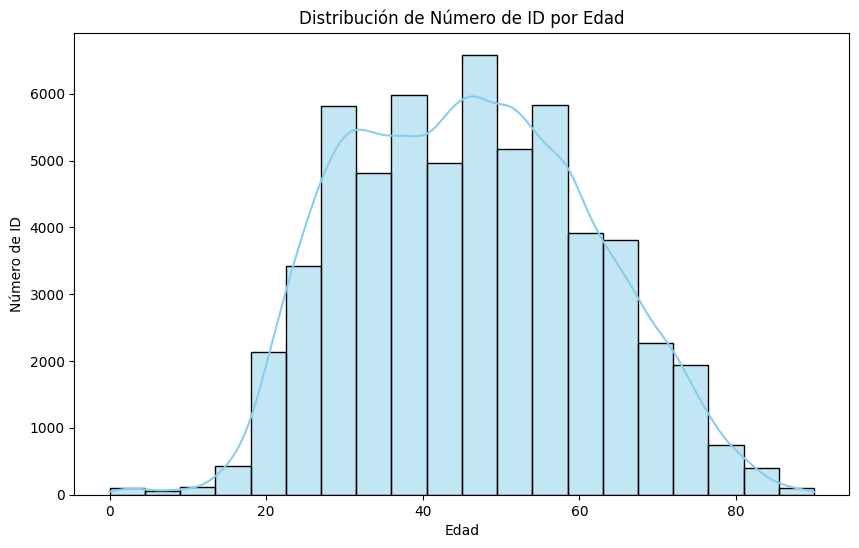

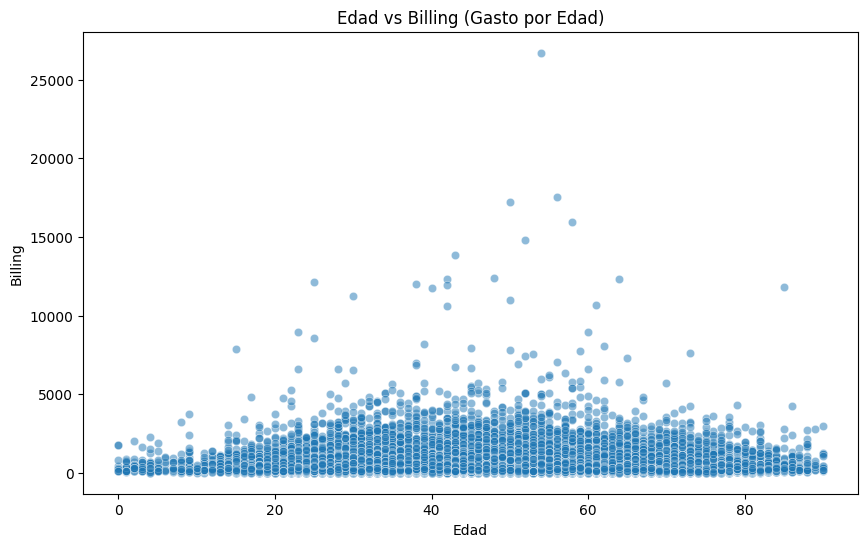

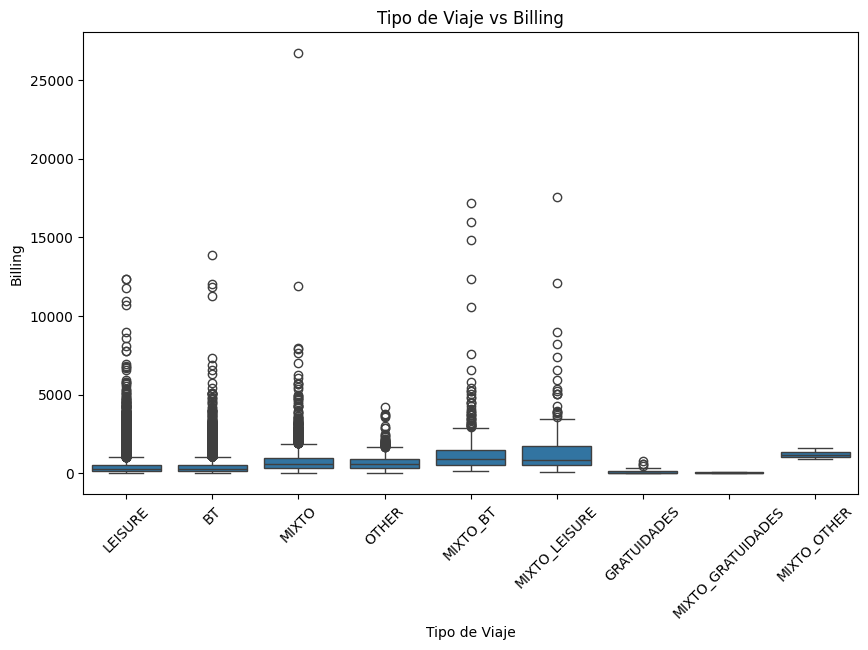

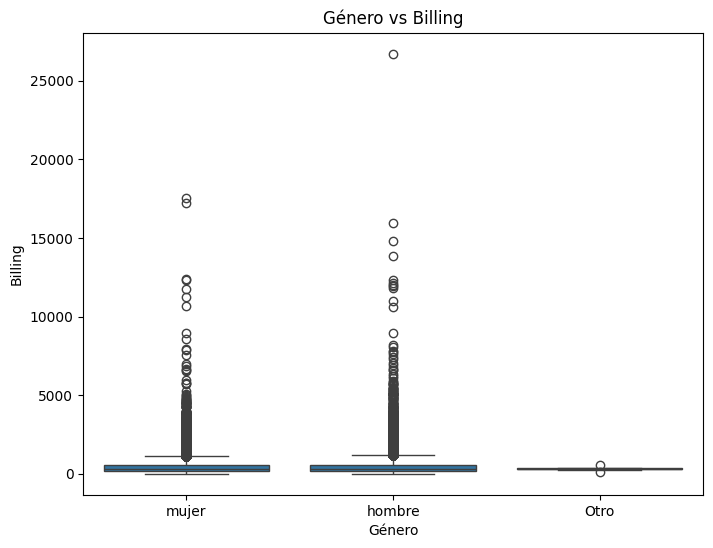

In [205]:
# Gráfico 1: Número de ID por Edad
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Número de ID por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de ID')
plt.show()

# Gráfico 2: Edad vs Billing (Gasto por Edad)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='billing', data=df, alpha=0.5)
plt.title('Edad vs Billing (Gasto por Edad)')
plt.xlabel('Edad')
plt.ylabel('Billing')
plt.show()

# Gráfico 3: Tipo de Viaje vs Billing
plt.figure(figsize=(10, 6))
sns.boxplot(x='travel_reason', y='billing', data=df)
plt.title('Tipo de Viaje vs Billing')
plt.xlabel('Tipo de Viaje')
plt.ylabel('Billing')
plt.xticks(rotation=45)
plt.show()

# Gráfico 4: Género vs Billing
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='billing', data=df)
plt.title('Género vs Billing')
plt.xlabel('Género')
plt.ylabel('Billing')
plt.show()



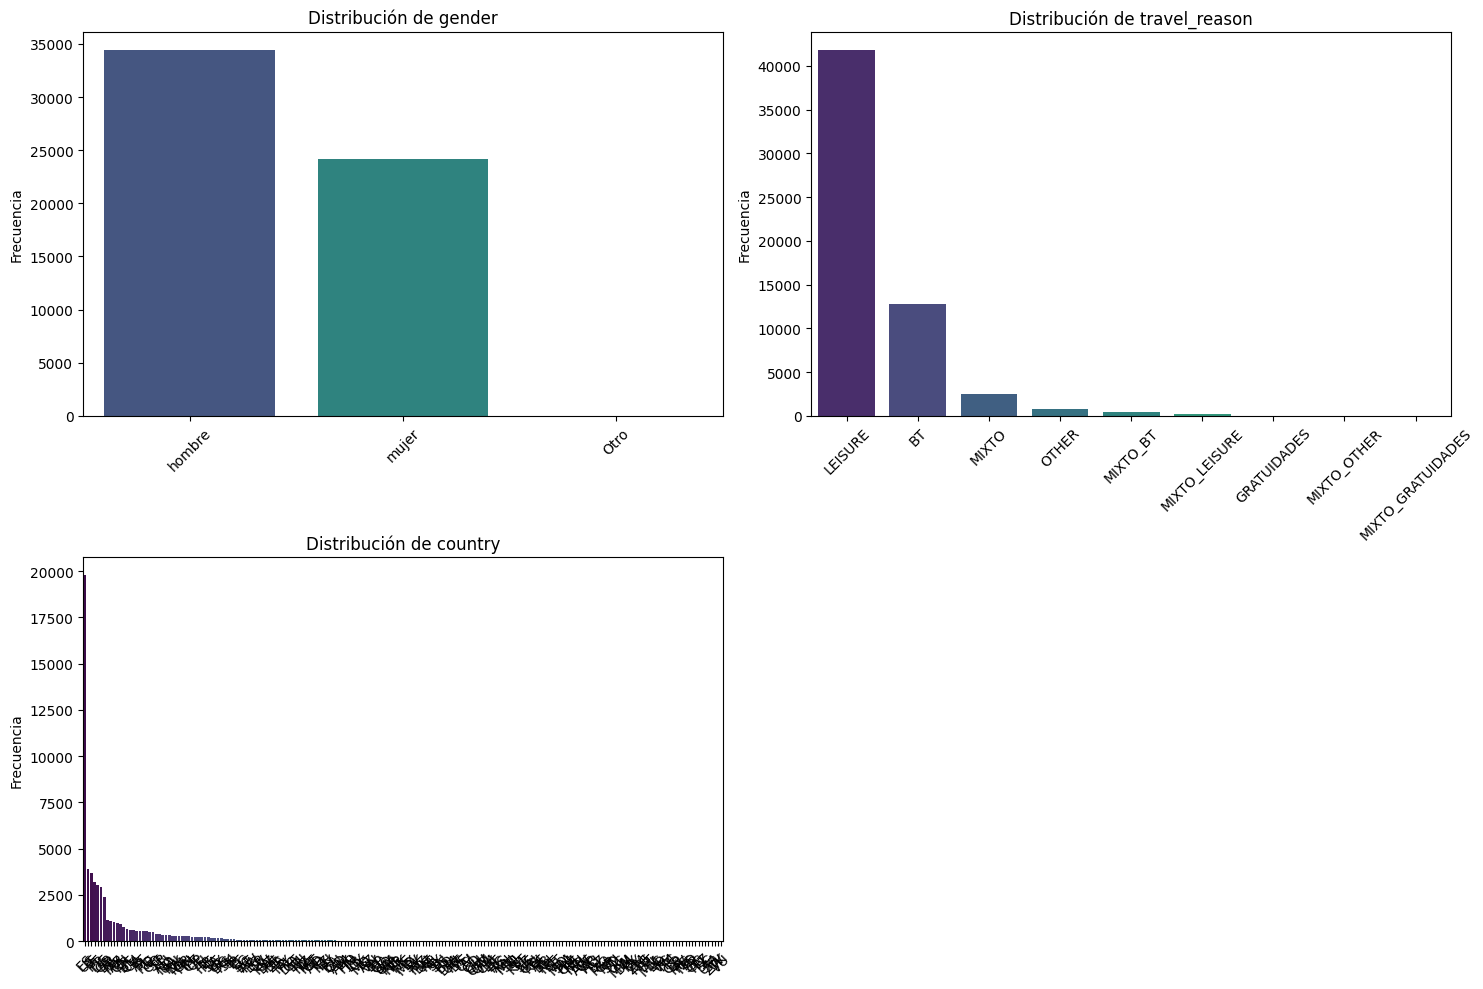

In [206]:
# Definir las columnas categóricas que deseas graficar
columnas_categoricas = ['gender', 'travel_reason', 'country']

# Llamar a la función para graficar la distribución
btc.pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False)


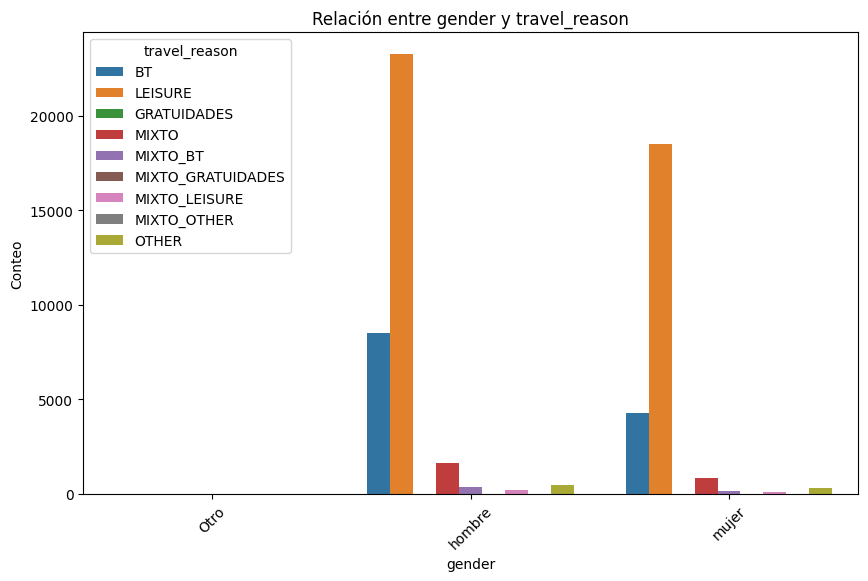

In [207]:
# Definir las columnas categóricas que deseas comparar
cat_col1 = 'gender'
cat_col2 = 'travel_reason'

# Llamar a la función para graficar la relación entre las dos columnas
btc.plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group=5)


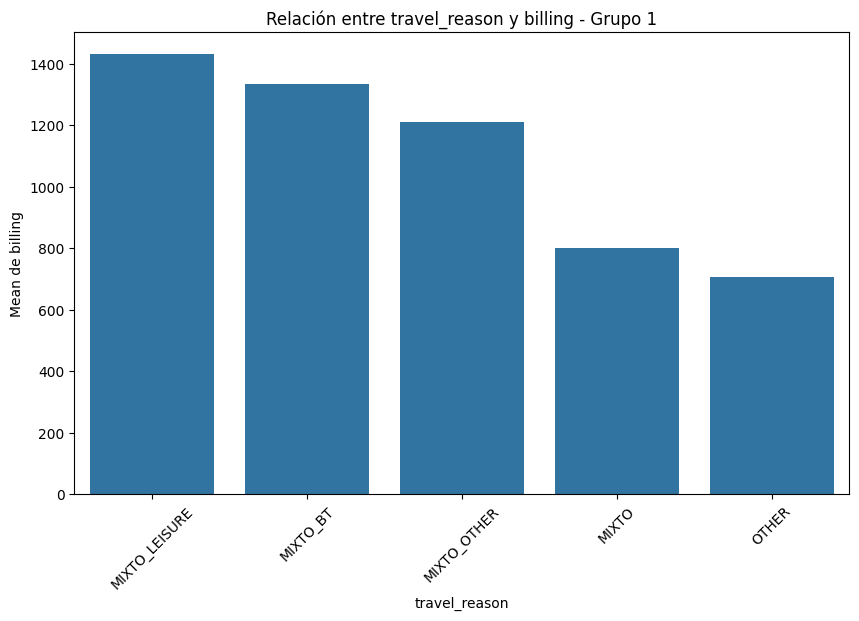

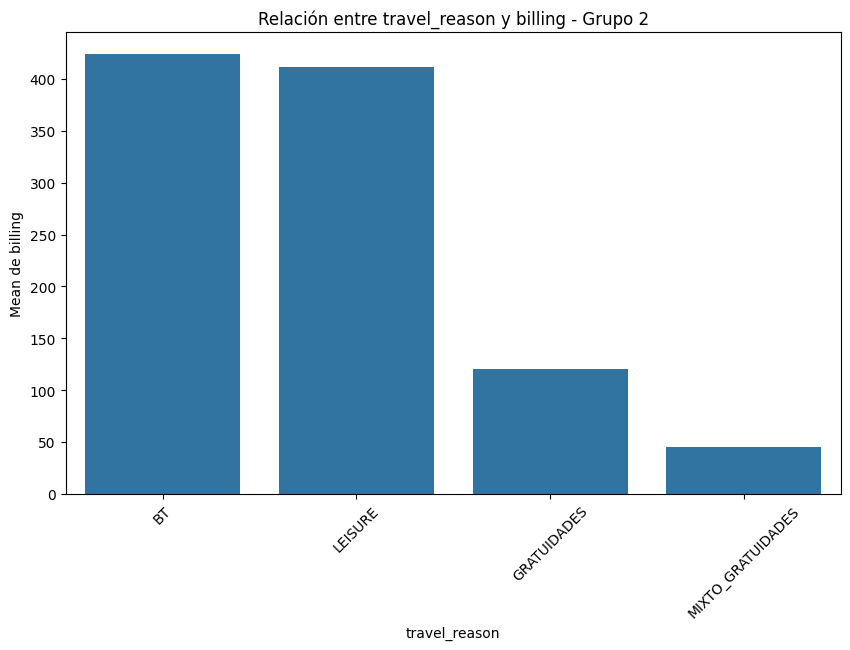

In [208]:
# Definir la columna categórica y la columna numérica para analizar
categorical_col = 'travel_reason'
numerical_col = 'billing'

# Llamar a la función para graficar la relación
btc.plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean')


(3, 2)


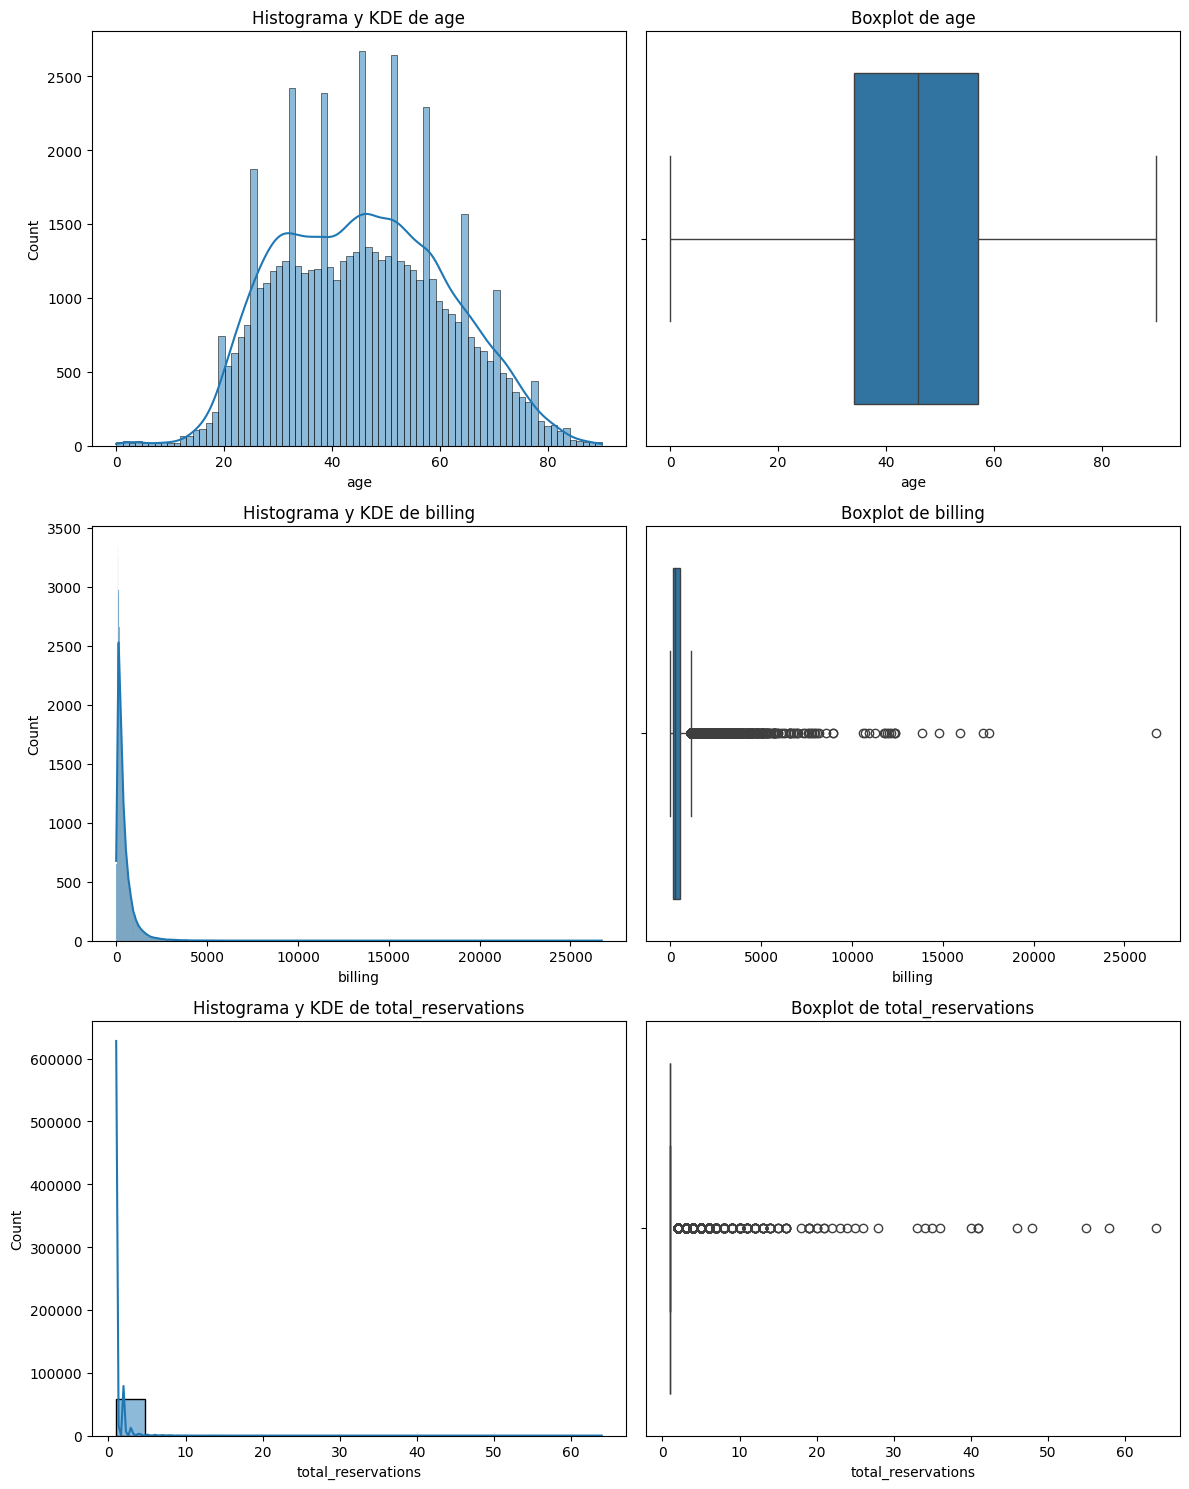

In [209]:
# Definir las columnas numéricas que deseas analizar
columns = ['age', 'billing', 'total_reservations']

# Llamar a la función para graficar histogramas y boxplots
btc.plot_combined_graphs(df, columns, whisker_width=1.5)


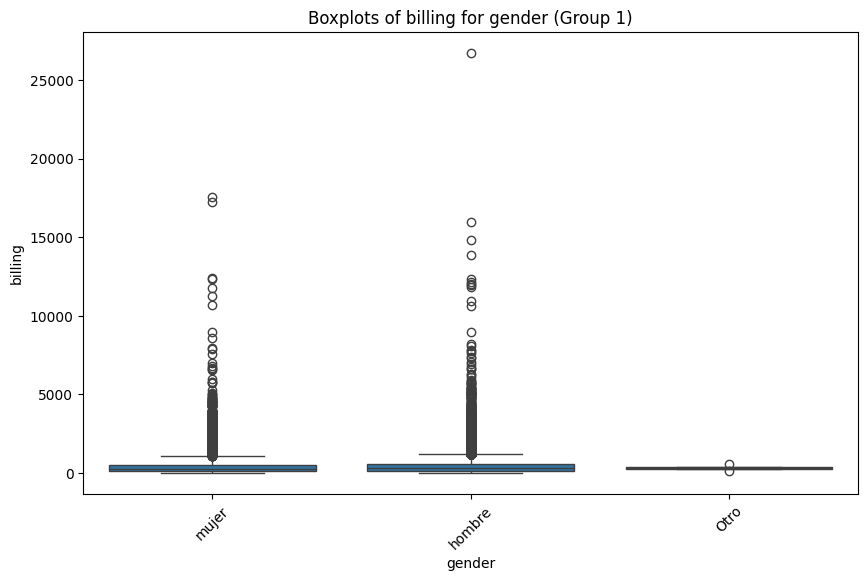

In [210]:
# Definir la columna categórica y numérica para analizar
cat_col = 'gender'
num_col = 'billing'

# Llamar a la función para graficar boxplots agrupados
btc.plot_grouped_boxplots(df, cat_col, num_col)


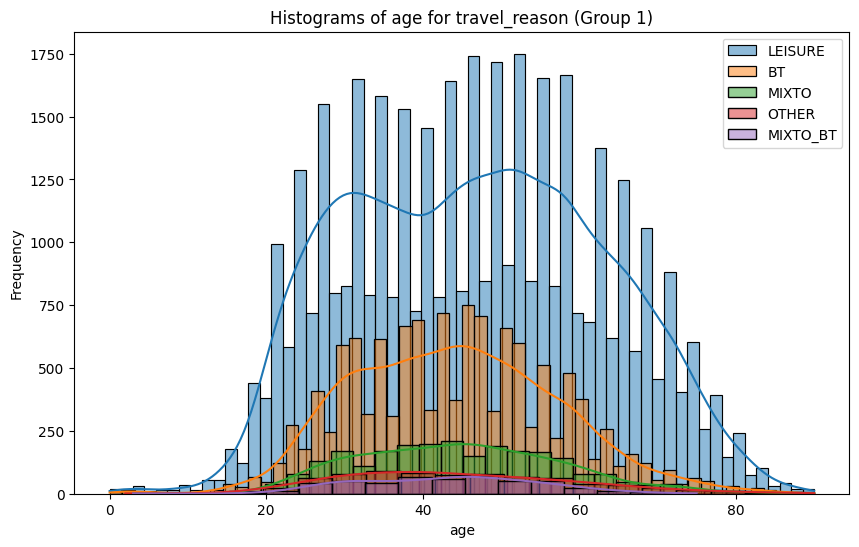

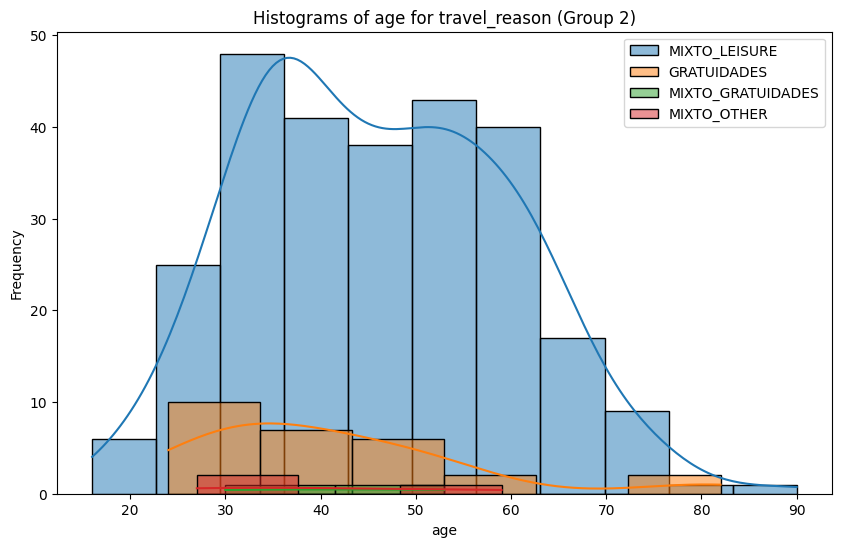

In [211]:
# Definir la columna categórica y numérica para analizar
cat_col = 'travel_reason'
num_col = 'age'
group_size = 5

# Llamar a la función para graficar histogramas agrupados
btc.plot_grouped_histograms(df, cat_col, num_col, group_size)


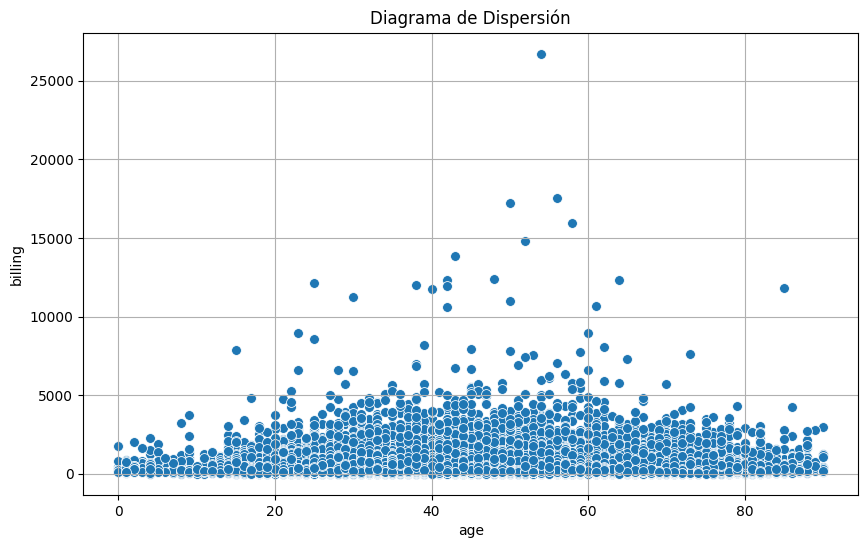

In [212]:
# Definir las columnas numéricas para el eje X e Y
columna_x = 'age'
columna_y = 'billing'

# Llamar a la función para graficar el diagrama de dispersión con correlación
btc.grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False)


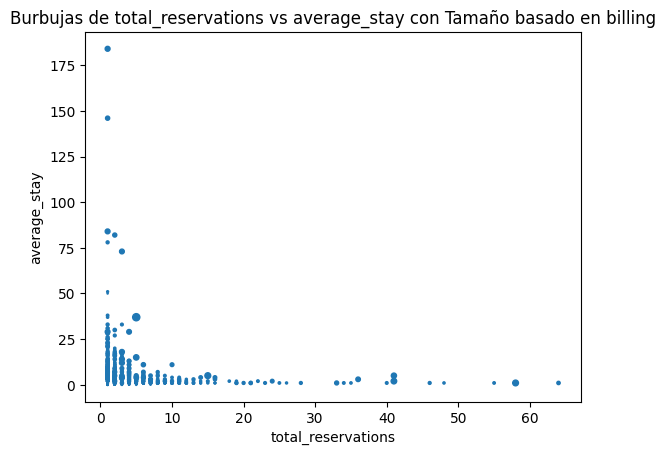

In [213]:
# Definir las columnas numéricas para el eje X, Y y el tamaño de las burbujas
col_x = 'total_reservations'
col_y = 'average_stay'
col_size = 'billing'

# Llamar a la función para graficar el gráfico de burbujas
btc.bubble_plot(df, col_x, col_y, col_size, scale=1000)


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58584 entries, 4 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sequential_id            58584 non-null  object        
 1   gender                   58584 non-null  object        
 2   treatment                58584 non-null  object        
 3   date_time                58584 non-null  datetime64[ns]
 4   country                  58584 non-null  object        
 5   birth_date               58584 non-null  datetime64[ns]
 6   email                    58584 non-null  bool          
 7   total_reservations       58584 non-null  float64       
 8   average_stay             58584 non-null  float64       
 9   average_advance_booking  58584 non-null  int32         
 10  reservation_channel      58584 non-null  object        
 11  travel_reason            58584 non-null  object        
 12  last_reservation         58584 non-nu

In [215]:
df.to_csv('./data/archivo_limpio.csv', index=False)

# Respuestas


#### Propuesta de campañas: Sabiendo que queremos, por un lado, agradecer a los clientes más 'top' y, por otro, llamar la atención de aquellos clientes que creemos potenciales para que sean recurrentes en un futuro, ¿cómo identificarías o segmentarías los clientes más top? ¿Y los potenciales clientes recurrentes? ¿Qué variables echas en falta para poder afinar tu segmentación? ¿Cuáles serían tus resultados?


### Propuesta de Campañas de Marketing

#### Objetivo: Agradecer a los Clientes Más 'Top' y Captar a Potenciales Clientes Recurrentes

#### Identificación y Segmentación de Clientes

1. **Clientes Más 'Top'**
   - **Criterios de Identificación**:
     - **Facturación**: Los clientes con el mayor monto total de facturación.
     - **Número de Reservas**: Aquellos con el mayor número de reservas realizadas.
   - **Estrategia**: 
     - Enviar ofertas exclusivas y personalizadas.
     - Proporcionar beneficios adicionales como upgrades, descuentos especiales y acceso a eventos exclusivos.

2. **Potenciales Clientes Recurrentes**
   - **Criterios de Identificación**:
     - **Antelación de Reserva**: Clientes que reservan con mayor anticipación, ya que muestran planificación y potencial para futuras reservas.
     - **Duración Media de la Estancia**: Clientes con estancias más largas, que indican mayor compromiso y satisfacción.
     - **Tipo de Viaje**:
       - **Ocio**: Campañas estacionales que se centran en recordar a estos clientes antes de los periodos vacacionales habituales.
       - **Trabajo**: Clientes de negocios que viajan con mayor frecuencia, presentando una oportunidad para fidelizar no solo a individuos sino también a empresas.
   - **Estrategia**:
     - Para viajes de ocio, diseñar campañas que se lancen antes de las temporadas altas de vacaciones.
     - Para viajes de negocios, ofrecer programas de fidelización específicos para empresas y sus empleados, incluyendo descuentos corporativos y beneficios adicionales.

#### Variables Adicionales Necesarias
- **Canal de Reserva**:
  - **Precisión**: Necesitamos más precisión en la variable de canal de reserva para determinar el origen exacto de los clientes.
  - **Estrategia**:
    - Si se identifica que ciertos canales como SEO o SEM en Google son más efectivos, enfocar esfuerzos en optimizar estos canales.
    - Evaluar la efectividad de proveedores de viajes específicos (ej. agencias de viajes) y diseñar paquetes atractivos para aquellos que traen más clientes.

#### Resultados Esperados
- **Clientes Más 'Top'**:
  - Aumento en la satisfacción y lealtad del cliente.
  - Incremento en la facturación a través de beneficios exclusivos y personalizados.
- **Potenciales Clientes Recurrentes**:
  - Mayor retención de clientes con potencial recurrente.
  - Incremento en la frecuencia de reservas y la duración de las estancias.
  - Identificación de nuevos clientes empresariales y oportunidades de crecimiento a través de programas de fidelización corporativos.








#### Modelo predictivo: Al margen de las campañas de marketing, ¿qué otro tipo de valor le darías a estos datos? ¿Qué modelo predictivo podrías crear alrededor de los clientes? ¿Sabrías cómo hacerlo?
Se valorarán las explicaciones y insights que se detecten como también que las gráficas y los resultados sean fáciles de leer. No se trata de escupir los datos, sino contar una historia con ellos. Este report lo debería poder leer tanto un perfil técnico como un perfil de negocio.
Respondido en el BI
### Modelo predictivo: Maximización de la facturación a través del análisis de datos de clientes

Estos datos son fundamentales no solo para campañas de marketing, sino también para entrenar modelos predictivos que estimen el gasto y la duración de la relación de los clientes con la empresa. En el notebook de Machine Learning de este repositorio, se llevó a cabo una breve comparativa de modelos para este propósito.

#### Creación de modelos predictivos

El objetivo es identificar qué características de los clientes influyen más en el gasto total y en la duración de su relación con la empresa. Aquí se destacan los siguientes pasos:

 **Selección de características relevantes**: Determinar qué variables, como datos demográficos, historial de compras, y comportamientos en el sitio web, son más significativas para predecir el gasto de un cliente y su duración como cliente.



